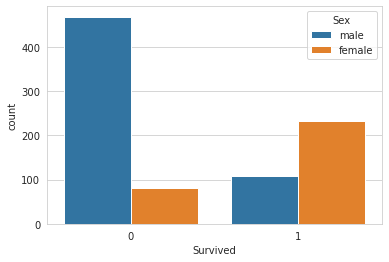

In [5]:

import types
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_43de553ea9d348f882c3fe4504be0b92 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='85jXCAhG1Q45UEwaQ5f8ORImCFAaHvdSJSyOACE_cYKG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_43de553ea9d348f882c3fe4504be0b92.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-nvr4gco17qpjzp',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

df_data_1.replace('', np.nan)

missing = df_data_1.isnull()
missing_data = pd.DataFrame(missing.any())
missing_data = missing_data[missing_data[0]].index.tolist()

sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data =df_data_1 )

In [2]:
df_data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:

for i in missing.columns.tolist():
    if(i in missing_data):
        print(i)
        print(missing[i].value_counts())
        print()

Age
False    714
True     177
Name: Age, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



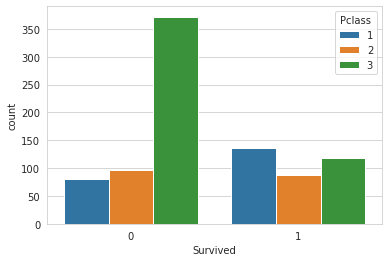

In [4]:
sns.countplot(x= 'Survived' , hue = 'Pclass' , data= df_data_1)

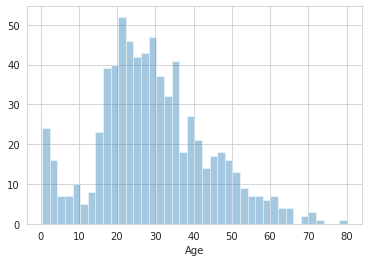

In [5]:
sns.distplot(df_data_1['Age'].dropna(), bins = 40,kde = False)

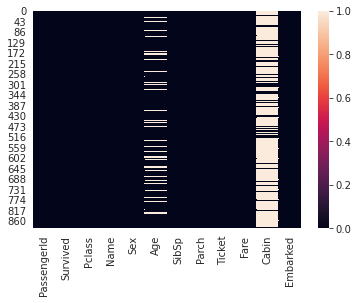

In [6]:
sns.heatmap(df_data_1.isnull())

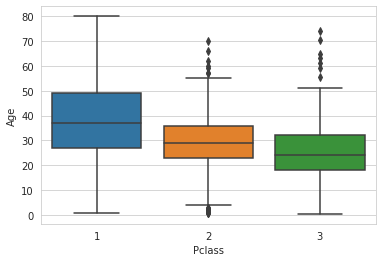

In [7]:

sns.boxplot(x = 'Pclass' , y = 'Age', data = df_data_1)

In [13]:
df_data_1['Age'] = np.where((pd.isnull(df_data_1['Age'])) & (df_data_1['Pclass'] == 1), 37.0, df_data_1['Age'])
df_data_1['Age'] = np.where((pd.isnull(df_data_1['Age'])) & (df_data_1['Pclass'] == 2), 28.0, df_data_1['Age'])
df_data_1['Age'] = np.where((pd.isnull(df_data_1['Age'])) & (df_data_1['Pclass'] == 3), 25.0, df_data_1['Age'])



In [14]:

df_pclass = df_data_1['Pclass']
df_age = df_data_1['Age']
        
for i in df_data_1.index:
    print(i,df_data_1.loc[i,'Age'],df_data_1.loc[i ,'Pclass' ])

0 22.0 3
1 38.0 1
2 26.0 3
3 35.0 1
4 35.0 3
5 25.0 3
6 54.0 1
7 2.0 3
8 27.0 3
9 14.0 2
10 4.0 3
11 58.0 1
12 20.0 3
13 39.0 3
14 14.0 3
15 55.0 2
16 2.0 3
17 28.0 2
18 31.0 3
19 25.0 3
20 35.0 2
21 34.0 2
22 15.0 3
23 28.0 1
24 8.0 3
25 38.0 3
26 25.0 3
27 19.0 1
28 25.0 3
29 25.0 3
30 40.0 1
31 37.0 1
32 25.0 3
33 66.0 2
34 28.0 1
35 42.0 1
36 25.0 3
37 21.0 3
38 18.0 3
39 14.0 3
40 40.0 3
41 27.0 2
42 25.0 3
43 3.0 2
44 19.0 3
45 25.0 3
46 25.0 3
47 25.0 3
48 25.0 3
49 18.0 3
50 7.0 3
51 21.0 3
52 49.0 1
53 29.0 2
54 65.0 1
55 37.0 1
56 21.0 2
57 28.5 3
58 5.0 2
59 11.0 3
60 22.0 3
61 38.0 1
62 45.0 1
63 4.0 3
64 37.0 1
65 25.0 3
66 29.0 2
67 19.0 3
68 17.0 3
69 26.0 3
70 32.0 2
71 16.0 3
72 21.0 2
73 26.0 3
74 32.0 3
75 25.0 3
76 25.0 3
77 25.0 3
78 0.83 2
79 30.0 3
80 22.0 3
81 29.0 3
82 25.0 3
83 28.0 1
84 17.0 2
85 33.0 3
86 16.0 3
87 25.0 3
88 23.0 1
89 24.0 3
90 29.0 3
91 20.0 3
92 46.0 1
93 26.0 3
94 59.0 3
95 25.0 3
96 71.0 1
97 23.0 1
98 34.0 2
99 34.0 2
100 28.0 3
101 25.